- EDA
- divide data into dependent and independent
- split into train and test data
- model training(KNN)
- model testing
- model evaluation(classification_report,confusion_matrix,accuracy_score)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [7]:
df = pd.read_csv('cleaned_titanic_data.csv')
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [9]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender'], dtype='object')

# Split into dependent and independent

In [14]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = df['Survived']
X, y 

(     Pclass        Age  SibSp  Parch     Fare  Gender
 0         3  22.000000      1      0   7.2500       1
 1         1  38.000000      1      0  71.2833       0
 2         3  26.000000      0      0   7.9250       0
 3         1  35.000000      1      0  53.1000       0
 4         3  35.000000      0      0   8.0500       1
 ..      ...        ...    ...    ...      ...     ...
 886       2  27.000000      0      0  13.0000       1
 887       1  19.000000      0      0  30.0000       0
 888       3  29.699118      1      2  23.4500       0
 889       1  26.000000      0      0  30.0000       1
 890       3  32.000000      0      0   7.7500       1
 
 [891 rows x 6 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

# Split into train and test data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_train.shape,y_train.shape

((596, 6), (596,))

In [21]:
X_test.shape,y_test.shape

((295, 6), (295,))

# Model Building

In [66]:
model = KNeighborsClassifier( n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [70]:
X_train[:3]

,Pclass,Age,SibSp,Parch,Fare,Gender
6,1,54.000000,0,0,51.8625,1
718,3,29.699118,0,0,15.5000,1
685,2,25.000000,1,2,41.5792,1


In [72]:
y_train[:3]

6      0
718    0
685    0
Name: Survived, dtype: int64

In [74]:
y_pred_train[:3]

array([0, 0, 0], dtype=int64)

# Model Accuracy

In [77]:
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       374
           1       0.78      0.70      0.74       222

    accuracy                           0.82       596
   macro avg       0.81      0.79      0.80       596
weighted avg       0.81      0.82      0.81       596

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       175
           1       0.69      0.56      0.62       120

    accuracy                           0.72       295
   macro avg       0.71      0.69      0.70       295
weighted avg       0.72      0.72      0.71       295



In [79]:
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.8154362416107382
0.7186440677966102


In [81]:
confusion_matrix(y_train,y_pred_train)

array([[331,  43],
       [ 67, 155]], dtype=int64)

In [83]:
confusion_matrix(y_test,y_pred_test)

array([[145,  30],
       [ 53,  67]], dtype=int64)

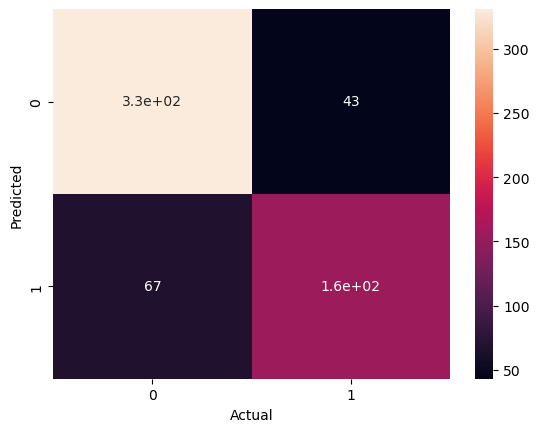

In [95]:
sb.heatmap(confusion_matrix(y_train,y_pred_train) , annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

import warnings
warnings.filterwarnings('ignore')


In [86]:
accuracy_score(y_train,y_pred_train)

0.8154362416107382

In [89]:
accuracy_score(y_test,y_pred_test)

0.7186440677966102